# Exploratory Data Analysis On Haberman’s Cancer Survival Data set

The Haberman Cancer Survival Dataset contains data that is based on a study that was conducted between 1958 and 1970 at University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 

<u>Features</u>:
1. Age of patient at time of operation
2. Patient's year of operation (20th century, 19_ _)
3. Number of positive axillary nodes detected

<u>Class</u>:<br>
Survival status : 1 = the patient survived 5 years or longer. 2 = the patient died within 5 years.


### Objective:

To predict whether a patient will survive after 5 years or die within five years based on age of patient, year of operation and number of positive axillary nodes.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("haberman.csv")
print("Number of Data points: ",df.shape[0])
r=df["status"].value_counts()  #eturn a Series containing counts of unique values
print("Number of data points per class: ")
print("  Class   Count ")
print("  -----   -----")
print("   1     ",r[1])
print("   2      ",r[2])
print(df.describe())

Number of Data points:  306
Number of data points per class: 
  Class   Count 
  -----   -----
   1      225
   2       81
              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


The datset contains 306 data points, 3 features and 1 target set with 2 classes. The study shows that 225 patients have survived more than five years after surgery and 81 patients have not survived with in five years. The mean age of patients at the time of operation is 52. No axilary nodes have been detected in 25% of patients.






## Uni variate Analysis
### Histogram, PDF








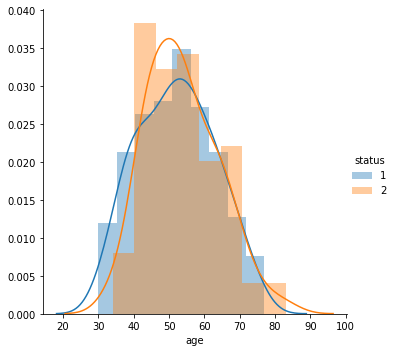

In [13]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "age").add_legend();
plt.show();

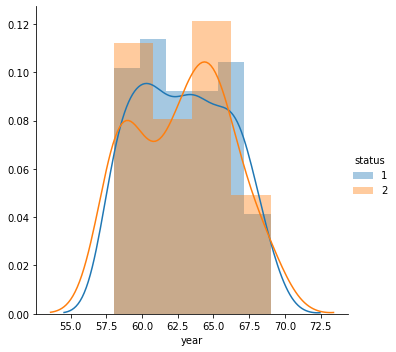

In [12]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "year").add_legend();
plt.show();

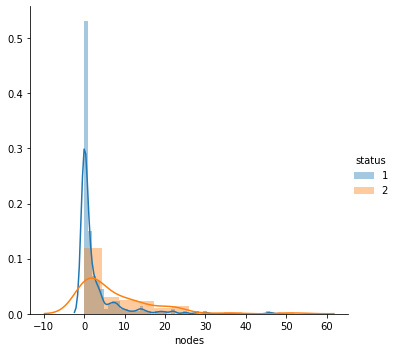

In [14]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "nodes").add_legend();
plt.show();

The age and year are not good features for classification since the PDFs of both features are overlapping for majority of the data points. It has been observed from the PDF of nodes that more patients with less number of axillary nodes have been survived.

### CDF

Survived:
PDF: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Bin edges: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

Not Survived:
PDF: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Bin edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


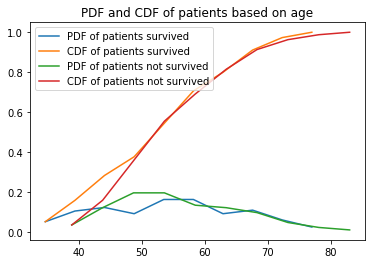

In [32]:
s = df.loc[df["status"]==1]
ns = df.loc[df['status'] == 2]
c,e= np.histogram(s['age'],bins=10,density=True)
pdf = c/(sum(c))
cdf = np.cumsum(pdf)
plt.plot(e[1:],pdf)
plt.plot(e[1:],cdf)
print('Survived:')
print('PDF: {}'.format(pdf))
print('Bin edges: {}'.format(e))

print()
plt.title('PDF and CDF of patients based on age')
c,e = np.histogram(ns['age'],bins=10,density=True)
pdf = c/(sum(c))
cdf = np.cumsum(pdf)
plt.plot(e[1:],pdf)
plt.plot(e[1:],cdf)
plt.legend(['PDF of patients survived','CDF of patients survived','PDF of patients not survived','CDF of patients not survived'])
print('Not Survived:')
print('PDF: {}'.format(pdf))
print('Bin edges: {}'.format(e))



Survived:
PDF: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
Bin edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

Not Survived:
PDF: [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
Bin edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


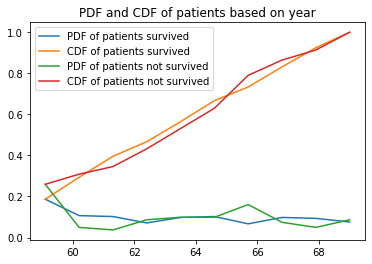

In [33]:
s = df.loc[df["status"]==1]
ns = df.loc[df['status'] == 2]
c,e= np.histogram(s['year'],bins=10,density=True)
pdf = c/(sum(c))
cdf = np.cumsum(pdf)
plt.plot(e[1:],pdf)
plt.plot(e[1:],cdf)
print('Survived:')
print('PDF: {}'.format(pdf))
print('Bin edges: {}'.format(e))

print()
plt.title('PDF and CDF of patients based on year')
c,e = np.histogram(ns['year'],bins=10,density=True)
pdf = c/(sum(c))
cdf = np.cumsum(pdf)
plt.plot(e[1:],pdf)
plt.plot(e[1:],cdf)
plt.legend(['PDF of patients survived','CDF of patients survived','PDF of patients not survived','CDF of patients not survived'])
print('Not Survived:')
print('PDF: {}'.format(pdf))
print('Bin edges: {}'.format(e))


Survived:
PDF: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bin edges: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

Not Survived:
PDF: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Bin edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


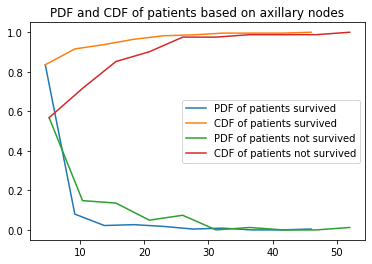

In [34]:
s = df.loc[df["status"]==1]
ns = df.loc[df['status'] == 2]
c,e= np.histogram(s['nodes'],bins=10,density=True)
pdf = c/(sum(c))
cdf = np.cumsum(pdf)
plt.plot(e[1:],pdf)
plt.plot(e[1:],cdf)
print('Survived:')
print('PDF: {}'.format(pdf))
print('Bin edges: {}'.format(e))

print()
plt.title('PDF and CDF of patients based on axillary nodes')
c,e = np.histogram(ns['nodes'],bins=10,density=True)
pdf = c/(sum(c))
cdf = np.cumsum(pdf)
plt.plot(e[1:],pdf)
plt.plot(e[1:],cdf)
plt.legend(['PDF of patients survived','CDF of patients survived','PDF of patients not survived','CDF of patients not survived'])
print('Not Survived:')
print('PDF: {}'.format(pdf))
print('Bin edges: {}'.format(e))

### * Most of the patients operated at the age of 50 years have not survived.
### * The success rate of operations in the year 1965 is very low. 
### * Patients with more number of axillary nodes have less chance of survival.

### Box Plots

Box plot gives 25th percentile,median and 75th percentile values respectively from bottom. Interquartile range (IQR) represents the distance between 25th and 75th percentiles.

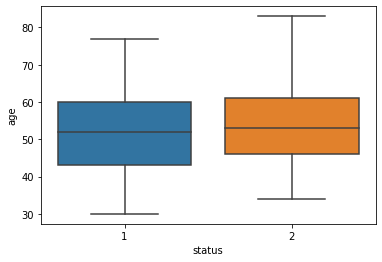

In [39]:

sns.boxplot(data=df,x='status',y='age')
plt.show()

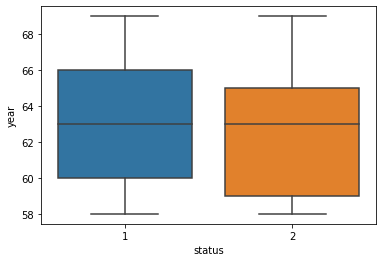

In [40]:
sns.boxplot(data=df,x='status',y='year')
plt.show()

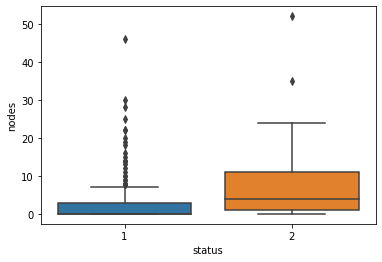

In [41]:
sns.boxplot(data=df,x='status',y='nodes')
plt.show()

### Violin Plots

* give information about distribution along with box plot.

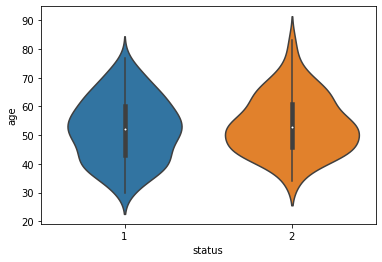

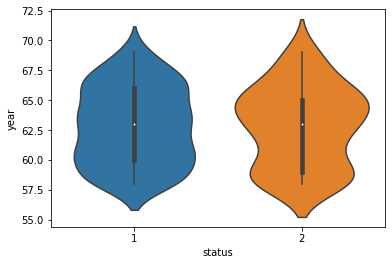

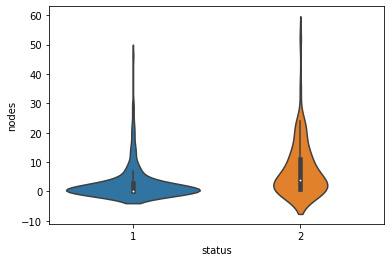

In [52]:
sns.violinplot(data=df,x='status',y='age')
plt.show()
sns.violinplot(data=df,x='status',y='year')
plt.show()
sns.violinplot(data=df,x='status',y='nodes')
plt.show()

###  * The patients with age greater than 70 years have less chance of survival.
###  * It is diificult to predict survival from the year of operation and it is considered as a bad feature for classification.
###  * It is clear from the plots that patients with more than 5 nodes have very less chance of survival.

## Bi-variate analysis

## 2-D Scatter Plot

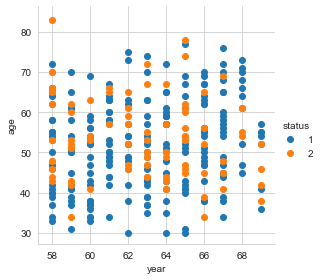

In [55]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=4).map(plt.scatter, "year", "age").add_legend();
plt.show();

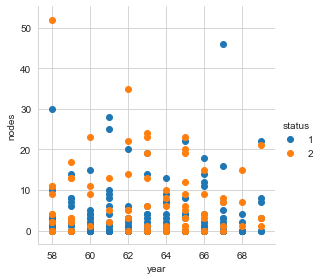

In [56]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=4).map(plt.scatter, "year", "nodes").add_legend();
plt.show();

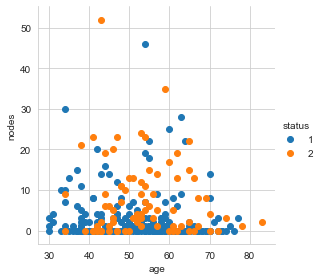

In [57]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=4).map(plt.scatter, "age", "nodes").add_legend();
plt.show();

## Pair plot

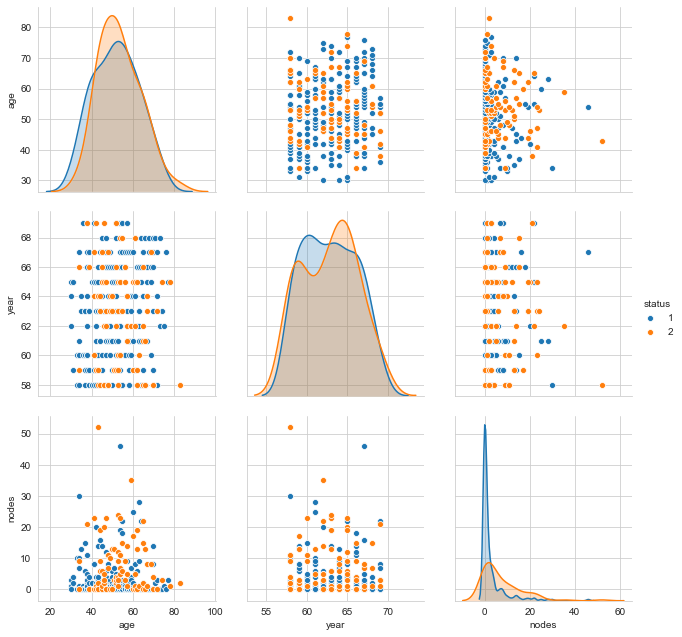

In [62]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", vars=['age','year','nodes'],height=3);
plt.show()

### * From the pair plots, it is observed that no classification can be done from 2-D plot as the data points are overlapping.

## Conclusions:

* The age and year are not good features for classification since the PDFs of both features are overlapping.
* No axilary nodes have been detected in 25% of patients.
* Most of the patients operated at the age of 50 years have not survived.¶
* Patients with more number of axillary nodes have less chance of survival.
* No classification is possible from from 2-D plot as the data points are random and overlapping.



